In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Travel.csv')

In [ ]:
df.shape

(4888, 20)

**Data Cleaning**

**Handlinng Missing Values**

**Check Spelling mistake**

In [ ]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [ ]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
  print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [ ]:
# statistical analysis
df[features_with_na].select_dtypes(exclude = 'object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


**Imputing Null values**

* Impute Median value for Age.
* Impute Mode for type of Contact.
* Impute Median for Duration of Pitch.
* Impute Mode for NumberOfFollowups.
* Impute Mode for PreferredPropertyStar.
* Impute Median for NumberofChildrenVisiting.
* Impute Median for MontlyIncome.

In [ ]:
df1 = df.copy()
#Age
df1.Age.fillna(df1.Age.median(),inplace = True)
#TypeofContact
df1.TypeofContact.fillna(df1.TypeofContact.mode()[0],inplace = True)
#DurationOfPitch
df1.DurationOfPitch.fillna(df1.DurationOfPitch.median(),inplace = True)
#NumberOfFollowups
df1.NumberOfFollowups.fillna(df1.NumberOfFollowups.mode()[0],inplace = True)
#PreferredPropertystar
df1.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace = True)
#NumberOfTrips
df1.NumberOfTrips.fillna(0,inplace = True)
#NumberOfChildrenVisiting
df1.NumberOfChildrenVisiting.fillna(df1.NumberOfChildrenVisiting.mode()[0],inplace = True)
#MonthlyIncome
df1.MonthlyIncome.fillna(df1.MonthlyIncome.median(),inplace = True)

In [ ]:
df1.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
df1.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


**Other Data Cleaning.**

**Handling duplicated dataset**

In [ ]:
df1.duplicated().sum()

0

Remove CustomerId from the dataset as it cannot use in ModelTraining.

Remove Gender column as it doesn't correlate with target variable which is ProdTaken.

In [ ]:
df1.drop('CustomerID',inplace = True,axis = 1)
df1.drop('Gender',inplace = True,axis = 1)

**Feature Engineering**

**Feature Extraction**

In [ ]:
# Create a new Column for feature
df1['TotalVisiting'] = df1['NumberOfPersonVisiting'] + df1['NumberOfChildrenVisiting']
df1.drop(columns = ['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis = 1,inplace = True)

Types Of Features

**NumericFeatures**

In [ ]:
num_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
print('Number of Numerical Features :',len(num_features))

Number of Numerical Features : 12


In [ ]:
cat_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']
print('Number of Categorical Features :',len(cat_features))

Number of Categorical Features : 5


In [ ]:
discrete_features = [feature for feature in num_features if len(df1[feature].unique())<=25]
print('Number of Discrete Features :',len(discrete_features))

Number of Discrete Features : 9


In [ ]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Num of Continous Features :',len(continuous_features))

Num of Continous Features : 3


**Multicolinearity Check**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features,df1):
  X = df1[considered_features]
  # the calculation of variance inflaction requires a constant
  X['intercept'] = 1
  # create a dataframe
  vif = pd.DataFrame()
  vif['Variable'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  vif = vif[vif['Variable']!= 'intercept']
  return vif

In [ ]:
compute_vif(num_features,df1)

,Variable,VIF
0,ProdTaken,1.160212
1,Age,1.338181
2,CityTier,1.016978
3,DurationOfPitch,1.010489
4,NumberOfFollowups,1.177131
5,PreferredPropertyStar,1.016637
6,NumberOfTrips,1.058434
7,Passport,1.082667
8,PitchSatisfactionScore,1.012579
9,OwnCar,1.012123


* VIF determines the strength of the correlation between the independent variables.it is predicted by taking a variable and regressing it aganist every other variable.
* **This dataset doesn't have any multicolinearity.**

**Check Outlier**

In [ ]:
discrete_features

['ProdTaken',
 'CityTier',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'TotalVisiting']

In [ ]:
continuous_features

['Age', 'DurationOfPitch', 'MonthlyIncome']

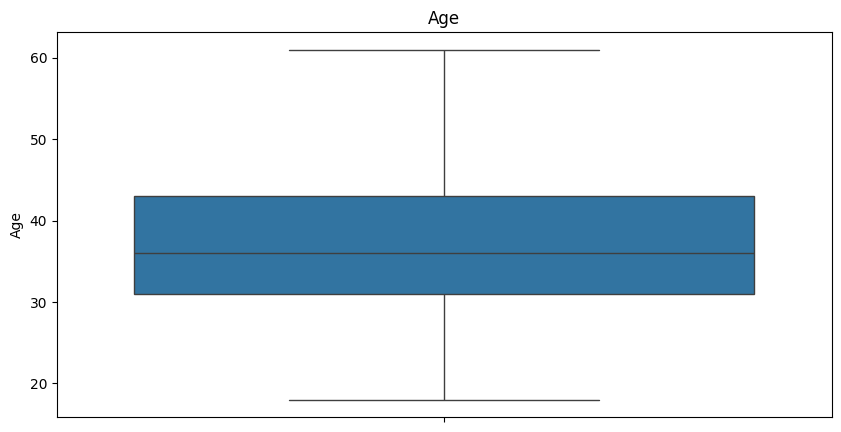

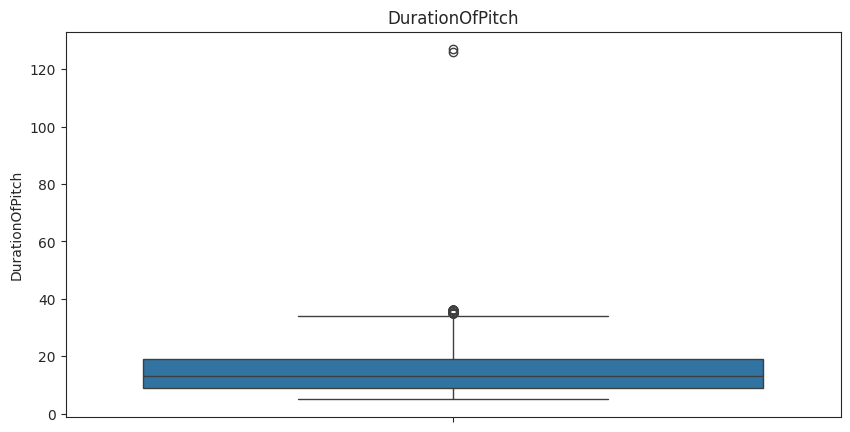

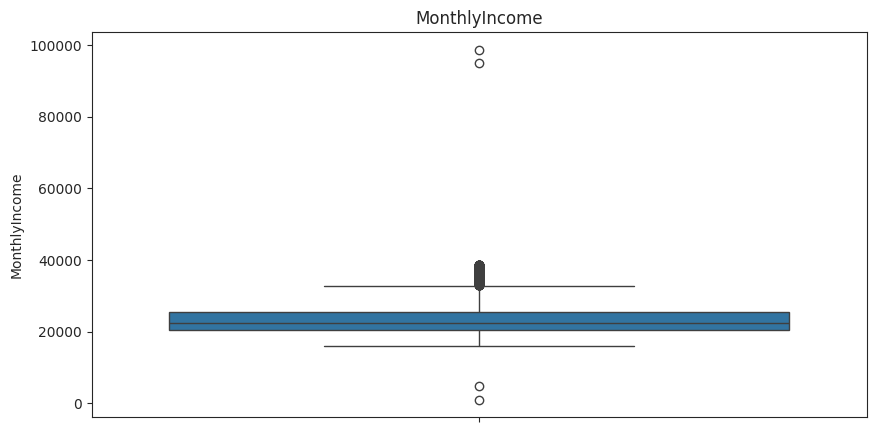

In [ ]:
for i in continuous_features:
  plt.figure(figsize = (10,5))
  plt.title(str(i))
  sns.set_style('ticks')
  ax = sns.boxplot(df1[i])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [ ]:
df1['CityTier'].value_counts()

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

In [ ]:
df1[continuous_features].skew(axis=0,skipna=True)

,0
Age,0.415796
DurationOfPitch,1.831803
MonthlyIncome,2.023306


In [ ]:
df1[num_features].skew(axis=0,skipna=True)

,0
ProdTaken,1.595763
Age,0.415796
CityTier,0.736531
DurationOfPitch,1.831803
NumberOfFollowups,-0.381849
PreferredPropertyStar,0.903725
NumberOfTrips,1.305234
Passport,0.920980
PitchSatisfactionScore,-0.127726
OwnCar,-0.495892


**Detecting Outlier and Capping it**

In [ ]:
def detect_outliers(col):
  # Finding the outlier
  percentile25 = df1[col].quantile(0.25)
  percentile75 = df1[col].quantile(0.75)
  print('\n ####',col,'####')
  print('percentile25',percentile25)
  print('percentile75',percentile75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 3 * iqr
  lower_limit = percentile25 - 3 * iqr
  print('Upper limit',upper_limit)
  print('Lower limit',lower_limit)
  df1.loc[(df1[col]>upper_limit),col] = upper_limit
  df1.loc[(df1[col]<lower_limit),col] = lower_limit
  return df1

In [ ]:
for col in num_features:
  detect_outliers(col)


 #### ProdTaken ####
percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0

 #### Age ####
percentile25 31.0
percentile75 43.0
Upper limit 79.0
Lower limit -5.0

 #### CityTier ####
percentile25 1.0
percentile75 3.0
Upper limit 9.0
Lower limit -5.0

 #### DurationOfPitch ####
percentile25 2.3025850929940455
percentile75 2.995732273553991
Upper limit 5.075173815233827
Lower limit 0.22314355131420927

 #### NumberOfFollowups ####
percentile25 3.0
percentile75 4.0
Upper limit 7.0
Lower limit 0.0

 #### PreferredPropertyStar ####
percentile25 3.0
percentile75 4.0
Upper limit 7.0
Lower limit 0.0

 #### NumberOfTrips ####
percentile25 1.0986122886681096
percentile75 1.6094379124341003
Upper limit 3.1419147837320724
Lower limit -0.4338645826298626

 #### Passport ####
percentile25 0.0
percentile75 1.0
Upper limit 4.0
Lower limit -3.0

 #### PitchSatisfactionScore ####
percentile25 2.0
percentile75 4.0
Upper limit 10.0
Lower limit -4.0

 #### OwnCar ####
percentile25 0.0
percentil

**Checking skewness after Oulier Capping**

In [ ]:
df1[continuous_features].skew(axis=0,skipna=True)

,0
Age,0.415796
DurationOfPitch,0.273031
MonthlyIncome,0.726163


**Feature Transformation**

In [ ]:
df1

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,0,41.0,Self Enquiry,3,6.0,Salaried,3.0,Deluxe,3.0,Unmarried,1.0,1.0,2,1.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,4.0,Deluxe,4.0,Divorced,2.0,0.0,3,1.0,Manager,20130.0,5.0
2,0,37.0,Self Enquiry,1,8.0,Free Lancer,4.0,Basic,3.0,Unmarried,7.0,1.0,3,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,3.0,Basic,3.0,Divorced,2.0,1.0,5,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,3.0,Basic,4.0,Divorced,1.0,0.0,5,1.0,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,0,49.0,Self Enquiry,3,9.0,Small Business,5.0,Deluxe,4.0,Unmarried,2.0,1.0,1,1.0,Manager,26576.0,4.0
4884,0,28.0,Company Invited,1,31.0,Salaried,5.0,Basic,3.0,Unmarried,3.0,1.0,3,1.0,Executive,21212.0,6.0
4885,0,52.0,Self Enquiry,3,17.0,Salaried,4.0,Standard,4.0,Married,7.0,0.0,1,1.0,Senior Manager,31820.0,7.0
4886,0,19.0,Self Enquiry,3,16.0,Small Business,4.0,Basic,3.0,Unmarried,3.0,0.0,5,0.0,Executive,20289.0,5.0


In [ ]:
df1.shape

(4888, 17)

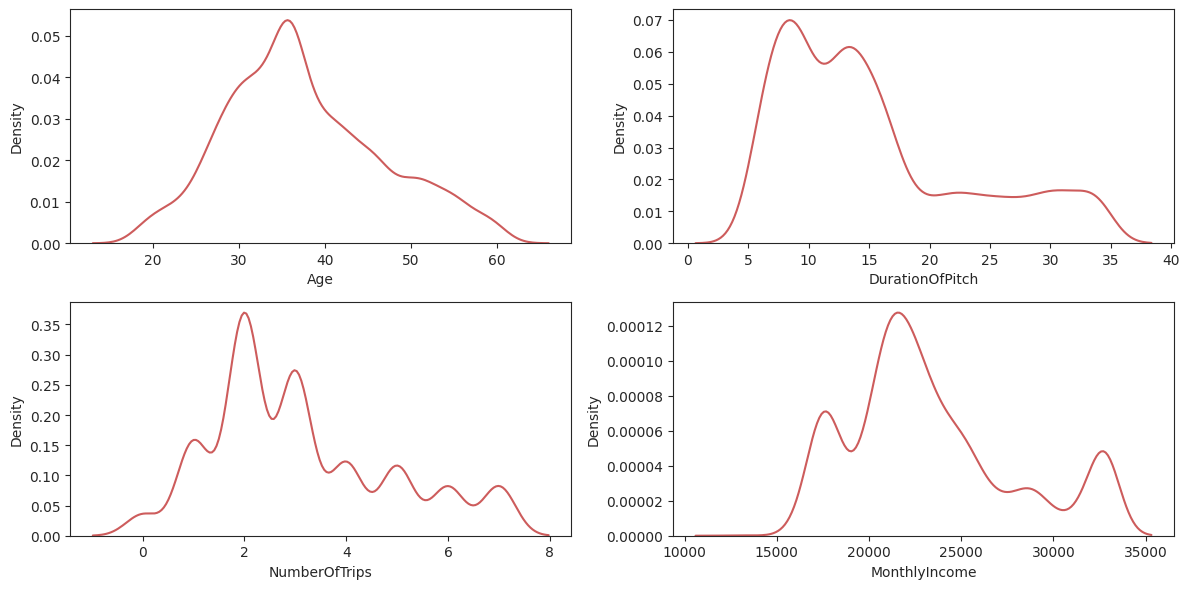

In [ ]:
plt.figure(figsize = (12,6))
for i,col in enumerate(['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x = df1[col], color = 'indianred')
  plt.xlabel(col)
  plt.tight_layout()

Positive Skewness: DurationOfPitch,NumberOfTrips.

There are outliers in all columns.

In [ ]:
# Applying Log Transformation
df1[['DurationOfPitch','NumberOfTrips']] = df1[['DurationOfPitch','NumberOfTrips']].apply(np.log1p)

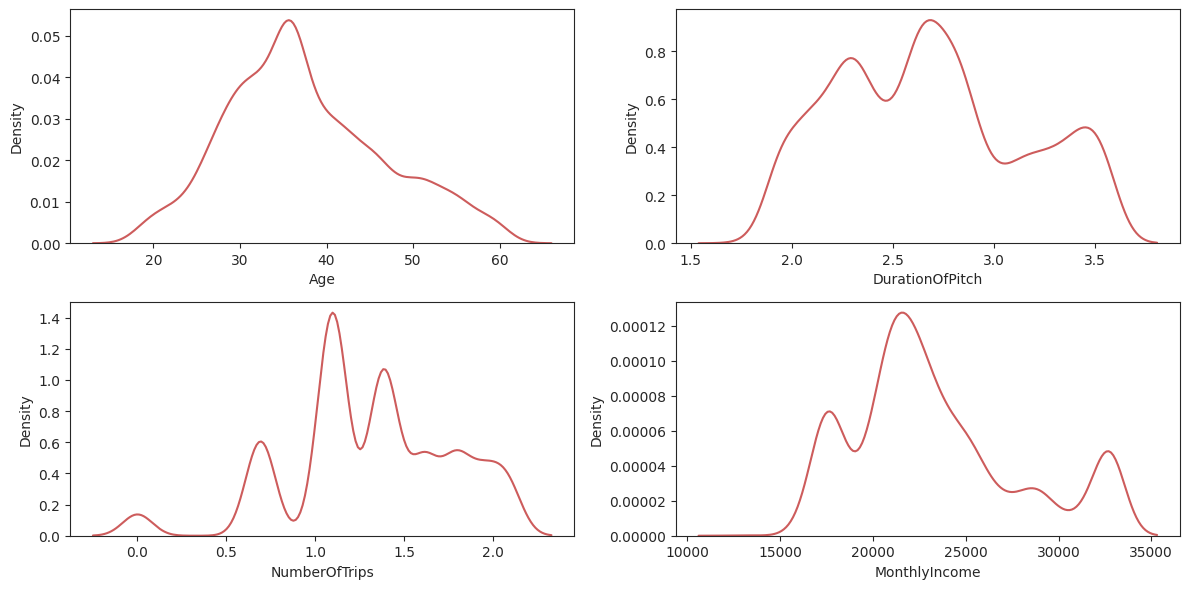

In [ ]:
# Distributed of after data transformation
plt.figure(figsize = (12,6))
for i,col in enumerate(['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x = df1[col], color = 'indianred')
  plt.xlabel(col)
  plt.tight_layout()

In [ ]:
df1_to_csv = df1.to_csv('Travel_Cleaned.csv',index = False)

**Split X and Y**

In [ ]:
from sklearn.model_selection import train_test_split
x = df1.drop(['ProdTaken'],axis = 1)
y = df1['ProdTaken']

In [ ]:
for feature  in cat_features:
  print(feature,':',x[feature].nunique())

TypeofContact : 2
Occupation : 4
ProductPitched : 5
MaritalStatus : 3
Designation : 5


**Feature Encoding and scaling**

In [ ]:
 # Create column Transformer with 3 types of transformers
cat_features = x.select_dtypes(include = 'object').columns
num_features = x.select_dtypes(exclude = 'object').columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
onehotencoder_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',onehotencoder_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [ ]:
x = preprocessor.fit_transform(x)

In [ ]:
x.shape

(4888, 30)

In [ ]:
x

array([[ 0.        ,  1.        ,  0.        , ...,  0.78239198,
        -0.51522978, -0.77047253],
       [ 1.        ,  0.        ,  0.        , ...,  0.78239198,
        -0.70643473,  0.64348269],
       [ 0.        ,  1.        ,  1.        , ..., -1.27813172,
        -1.37997244, -0.77047253],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78239198,
         1.88358365,  2.05743791],
       [ 0.        ,  1.        ,  0.        , ..., -1.27813172,
        -0.67120694,  0.64348269],
       [ 0.        ,  1.        ,  0.        , ...,  0.78239198,
         0.1600804 ,  1.3504603 ]])

**Handling Imbalanced Data**

In [ ]:
from imblearn.combine import SMOTETomek,SMOTEENN
smt = SMOTEENN(random_state = 42,sampling_strategy = 'minority')
# Fit the model to generate the data
x_res,y_res = smt.fit_resample(x,y)

In [ ]:
x_res.shape

(7115, 30)

In [ ]:
#seperate train and text dataset
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.2,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5692, 30), (1423, 30), (5692,), (1423,))

**Model Selection**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,\
                            precision_score,recall_score,f1_score

In [ ]:
models ={
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'Logistic Regression':LogisticRegression(),
    'K-Neighbors Classifier':KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(),
    'AdaboostClassifier':AdaBoostClassifier()
}
models_list = []
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train,y_train)

  # Make prediction
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  #Training set performance
  model_train_accuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average = 'weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred)

  #Test Set performance
  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average = 'weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model performance for Training set')
  print('- Accuracy:{:.4f}'.format(model_train_accuracy))
  print('- F1score:{:.4f}'.format(model_train_f1))
  print('- Precision:{:.4f}'.format(model_train_precision))
  print('- Recall:{:.4f}'.format(model_train_recall))

  print('------------------------------------------------------------------')
  print('Model performance for Testing set')
  print('- Accuracy:{:.4f}'.format(model_test_accuracy))
  print('- F1score:{:.4f}'.format(model_test_f1))
  print('- Precision:{:.4f}'.format(model_test_precision))
  print('- Recall:{:.4f}'.format(model_test_recall))

  print('='*35)
  print('\n')
  models_list.append([list(models.keys())[i],model_test_accuracy])
  report = pd.DataFrame(models_list,columns = ['Model Name','Accuracy']).sort_values(by = ['Accuracy'],ascending = False)

RandomForest
Model performance for Training set
- Accuracy:1.0000
- F1score:1.0000
- Precision:1.0000
- Recall:1.0000
------------------------------------------------------------------
Model performance for Testing set
- Accuracy:0.9810
- F1score:0.9810
- Precision:0.9815
- Recall:0.9828


DecisionTree
Model performance for Training set
- Accuracy:1.0000
- F1score:1.0000
- Precision:1.0000
- Recall:1.0000
------------------------------------------------------------------
Model performance for Testing set
- Accuracy:0.9361
- F1score:0.9360
- Precision:0.9313
- Recall:0.9498


Gradient Boosting
Model performance for Training set
- Accuracy:0.9239
- F1score:0.9240
- Precision:0.9452
- Recall:0.9155
------------------------------------------------------------------
Model performance for Testing set
- Accuracy:0.9234
- F1score:0.9235
- Precision:0.9451
- Recall:0.9089


Logistic Regression
Model performance for Training set
- Accuracy:0.7669
- F1score:0.7663
- Precision:0.7790
- Recall:0.80

In [ ]:
report

,Model Name,Accuracy
0,RandomForest,0.981026
5,XGBClassifier,0.978918
4,K-Neighbors Classifier,0.964863
1,DecisionTree,0.936051
2,Gradient Boosting,0.923401
6,AdaboostClassifier,0.871398
3,Logistic Regression,0.794097


**Here we can use RandomForest,XGBoost,K-Neighors and DecisionTree Classifier for Hyperparameter tuning**

In [ ]:
# Initialize few parameter for Hyperparameter tuning
Knn_params = {'n_neighbors':[2,3,10,20,40,50]}

rf_params = {'max_depth':[5,8,15,None,10],
             'max_features':[5,7,'auto',8],
             'min_samples_split':[2,8,15,20], # Fixed typo here
             'n_estimators':[100,200,500,1000],
             }
xgboost_params = {'learning_rate':[0.1,0.01],
                  'max_depth':[5,8,12,20,30],
                  'n_estimators':[100,200,300],
                  'colsample_bytree':[0.5,0.8,1,0.3,0.4]}

In [ ]:
#Models List for Hyperparameter Tuning
randomcv_models = [('KNN',KNeighborsClassifier(),Knn_params),
                   ('RF',RandomForestClassifier(),rf_params),
                   ('XGBoost',XGBClassifier(),xgboost_params)
                   ]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name,model,params in randomcv_models:
  random = RandomizedSearchCV(estimator =model,param_distributions = params,n_iter =100,cv = 3,verbose = 2,n_jobs = -1)
  random.fit(x_train,y_train)
  model_param[name] = random.best_params_
for model_name in model_param:
  print(f"-------------------Best Params for {model_name} ----------------")
  print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------------Best Params for KNN ----------------
{'n_neighbors': 2}
-------------------Best Params for RF ----------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
-------------------Best Params for XGBoost ----------------
{'n_estimators': 300, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 1}


**Retraining the model with best parameter**

In [ ]:
models = {'Random Forest':RandomForestClassifier(n_estimators = 200,min_samples_split = 2,max_features = 7,max_depth = 15),
          'K-Neighbors Classifier':KNeighborsClassifier(n_neighbors = 2),
          'XGBClassifier':XGBClassifier(n_estimators = 300,max_depth = 12,learning_rate = 0.1,colsample_bytree = 1,n_jobs = -1)
          }
models_list = []
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train,y_train)

  # Make prediction
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  #Training set performance
  model_train_accuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average = 'weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred)

  #Test Set performance
  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average = 'weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model performance for Training set')
  print('- Accuracy:{:.4f}'.format(model_train_accuracy))
  print('- F1score:{:.4f}'.format(model_train_f1))
  print('- Precision:{:.4f}'.format(model_train_precision))
  print('- Recall:{:.4f}'.format(model_train_recall))

  print('------------------------------------------------------------------')
  print('Model performance for Testing set')
  print('- Accuracy:{:.4f}'.format(model_test_accuracy))
  print('- F1score:{:.4f}'.format(model_test_f1))
  print('- Precision:{:.4f}'.format(model_test_precision))
  print('- Recall:{:.4f}'.format(model_test_recall))

  print('='*35)
  print('\n')
  models_list.append([list(models.keys())[i],model_test_accuracy])
  report = pd.DataFrame(models_list,columns = ['Model Name','Accuracy']).sort_values(by = ['Accuracy'],ascending = False)

Random Forest
Model performance for Training set
- Accuracy:1.0000
- F1score:1.0000
- Precision:1.0000
- Recall:1.0000
------------------------------------------------------------------
Model performance for Testing set
- Accuracy:0.9789
- F1score:0.9789
- Precision:0.9764
- Recall:0.9841


K-Neighbors Classifier
Model performance for Training set
- Accuracy:1.0000
- F1score:1.0000
- Precision:1.0000
- Recall:1.0000
------------------------------------------------------------------
Model performance for Testing set
- Accuracy:0.9944
- F1score:0.9944
- Precision:0.9895
- Recall:1.0000


XGBClassifier
Model performance for Training set
- Accuracy:1.0000
- F1score:1.0000
- Precision:1.0000
- Recall:1.0000
------------------------------------------------------------------
Model performance for Testing set
- Accuracy:0.9859
- F1score:0.9859
- Precision:0.9842
- Recall:0.9894




In [ ]:
report

,Model Name,Accuracy
1,K-Neighbors Classifier,0.994378
2,XGBClassifier,0.985945
0,Random Forest,0.978918


**In this model there have many high accuracy we can use cross validation score for futher evaluation.**

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 42)

In [ ]:
rf_cv_result = cross_val_score(RandomForestClassifier(n_estimators = 200,min_samples_split = 2,max_features = 7,max_depth = None),x_test,y_test,cv = skfold,scoring = 'accuracy',n_jobs = -1)
rf_cv = rf_cv_result.mean()*100
print('Random Forest classifier CV Mean Accuracy Score is {}',format(rf_cv))

Random Forest classifier CV Mean Accuracy Score is {} 91.56800945533338


In [ ]:
knn_cv_result = cross_val_score(KNeighborsClassifier(n_neighbors= 2),x_test,y_test,cv = skfold,scoring = 'accuracy',n_jobs = -1)
knn_cv = knn_cv_result.mean()*100
print('KNNeighbors Classifier CV Mean Accuracy Score is {}',format(knn_cv))

KNNeighbors Classifier CV Mean Accuracy Score is {} 91.63843199054466


In [ ]:
xgb_cv_result = cross_val_score(XGBClassifier(n_estimators = 300,max_depth = 20,learning_rate = 0.1,colsample_bytree = 0.5,n_jobs = -1),x_test,y_test,cv = skfold,scoring = 'accuracy',n_jobs = -1)
xgb_cv = xgb_cv_result.mean()*100
print('XGB Classifier CV Mean Accuracy Score is {}',format(xgb_cv))

XGB Classifier CV Mean Accuracy Score is {} 92.61942283069044


In [ ]:
best_model = XGBClassifier(n_estimators = 300,max_depth = 20,learning_rate = 0.1,colsample_bytree = 0.5,n_jobs = -1)
best_model_fit = best_model.fit(x_train,y_train)
y_pred = best_model_fit.predict(x_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print('Final Model XGBClassifier')
print('Accuracy Score value:{:4f}'.format(score))
print(cr)

Final Model XGBClassifier
Accuracy Score value:0.985945
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       666
           1       0.99      0.99      0.99       757

    accuracy                           0.99      1423
   macro avg       0.99      0.99      0.99      1423
weighted avg       0.99      0.99      0.99      1423



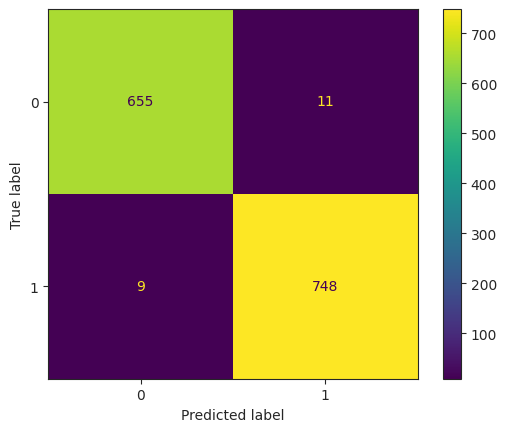

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model,x_test,y_test)

**Best Model is XGBoostClassifier with 98.59 % Accuracy.

In [ ]:
import pickle
pickle.dump(best_model,open('holidaypackagexgbmodel.pkl','wb'))